# PHASE 2 MILESTONE 2

# **I. INTRODUCTION**

Hello everybody! A warm welcome from me to you, welcome to my notebook. As the author of this notebook, here is my short profile:

* Name : Alexander Prasetyo Christianto
* Age : 23
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## 1.1 ABOUT THE DATA

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. This dataset is provided to be analyzed and developed into each analyzer creativity. In the dataset contains the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike databasa

All the images are traffic sign in Germany, there are 42 types/class of traffic sign and varies from speed limit sign, no passing sign, no vehicle sign, go straight or left, etc.

## 1.2 PROBLEM STATEMENT

Currently, Indonesia is still in the 3.0 industrial revolution. even so, the application of industry 3.0 has not yet been fully implemented in all sectors in Indonesia. One that has not been fully implemented is vehicle automation in Indonesia. Vehicle automation is one of the keys to advancing to the industrial revolution 4.0 and the Indonesian government should improve the transportation and vehicle systems in Indonesia to all parts of the country.

Automation of vehicles in Indonesia can be started from what has been implemented by the government, such as e-Tilang, Jak Lingko, etc. And from there, it can be further developed by revamping the roads so that self-driving cars can be implemented.

The development of a self-driving car is not an easy thing to do, but it is not impossible. It can be started one by one and one of them can be started with the introduction of existing road signs using machine learning so that the self-driving car still obeys and maintains the safety of the passengers being carried. There are many road signs and the computer must be able to recognize each road sign. Therefore, it is necessary to train a machine learning model to recognize road signs to be implemented in self-driving cars.

## 1.3 OBJECTIVES

Based on these problems, I want to have a deep learning model that has the ability to predict / classify the road signs, so that it can be implemented to a self-driving car or other related uses.

## 1.4 ACTION AND VALUES

Knowing each type of road signs and the characteristics, so that it can be implemented as to another system.

The values are:

- Elevating the industrial revolution from 3.0 to 4.0
- Cost efficient for vehicle manufacturer because it is build using open-source tools.

# **II. IMPORT LIBRARIES**

I like my notebook to be neat and tidy, so this section is used for importing all the libraries that I am going to use throughout this project.

In [1]:
# common dataframe
import pandas as pd
import numpy as np
import pickle
import pathlib
from pathlib import Path
import os
import random
import cv2

# Visualization
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

# math & statistic function
import scipy.stats as stats
import math

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# analyzing tools
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

np.random.seed(1)

# **III. DATA LOADING**

The dataset used in this project is obtained from this [link](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?datasetId=82373&sortBy=voteCount&language=Python)

First, we need to define the data directory for this project.

In [2]:
data_folder=r'../P2M2'
train_folder=r'../P2M2/Train/'
test_folder=r'../P2M2/Test/'

In [3]:
data_dir = pathlib.Path(data_folder)
train_path = pathlib.Path(train_folder)
test_path = pathlib.Path(test_folder)

After the data has been loaded into the notebook, the next step is to check how many images we have. In the cell below, I am counting the total images in train and test directory.

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
train_image_count = len(list(train_path.glob('*/*.png')))
print('Number of images in training folder: ', train_image_count)
print('Number of images in test folder: ', image_count)

Number of images in training folder:  39209
Number of images in test folder:  12673


As it can be seen from above there are about 39000 images for training and 12000 images for testing.

# **IV. EXPLORATIONS**

## 4.1 RESIZING THE IMAGES

The images that have been loaded comes in many size ranging from 30x30 pixels to 100x100 pixels.

In the below cell, I will define the width and height of images for resizing purposes. Channels is set to 3 because the images are in RGB format and I will process the images as it is.

In [5]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 50
IMG_WIDTH = 50
channels = 3

## 4.2 FINDING TOTAL CLASSES

The images comes in many classes, so I will try to find the total number of classes in my data.

In [6]:
NUM_CATEGORIES = len(os.listdir(train_folder))
NUM_CATEGORIES

43

There are 43 classes of images in the dataset.

## 4.3 RENAMING CLASSES NAMES

I have checked those 43 classes by directly accessing the images and from those images here are the classes based on each image's classes.

In [7]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## 4.4 VISUALIZING THE CLASSES

I am going to visualize some of the images for a preview.

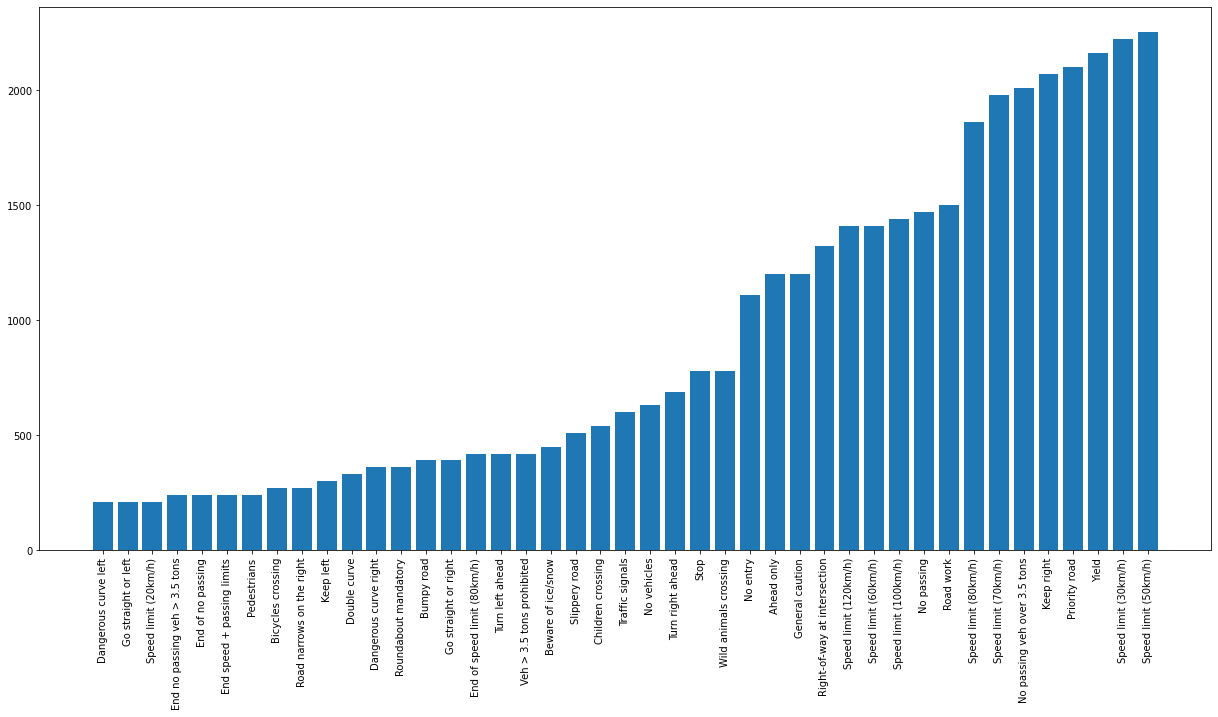

In [8]:
folders = os.listdir(train_folder)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_folder + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

From the images that is contained the training directory, class with the most images is `Speed limit (50 km/h)` and class with the least images is `Dangerous curve left`.

C:\Users\alexa\AppData\Local\Temp\ipykernel_4960\1467989705.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


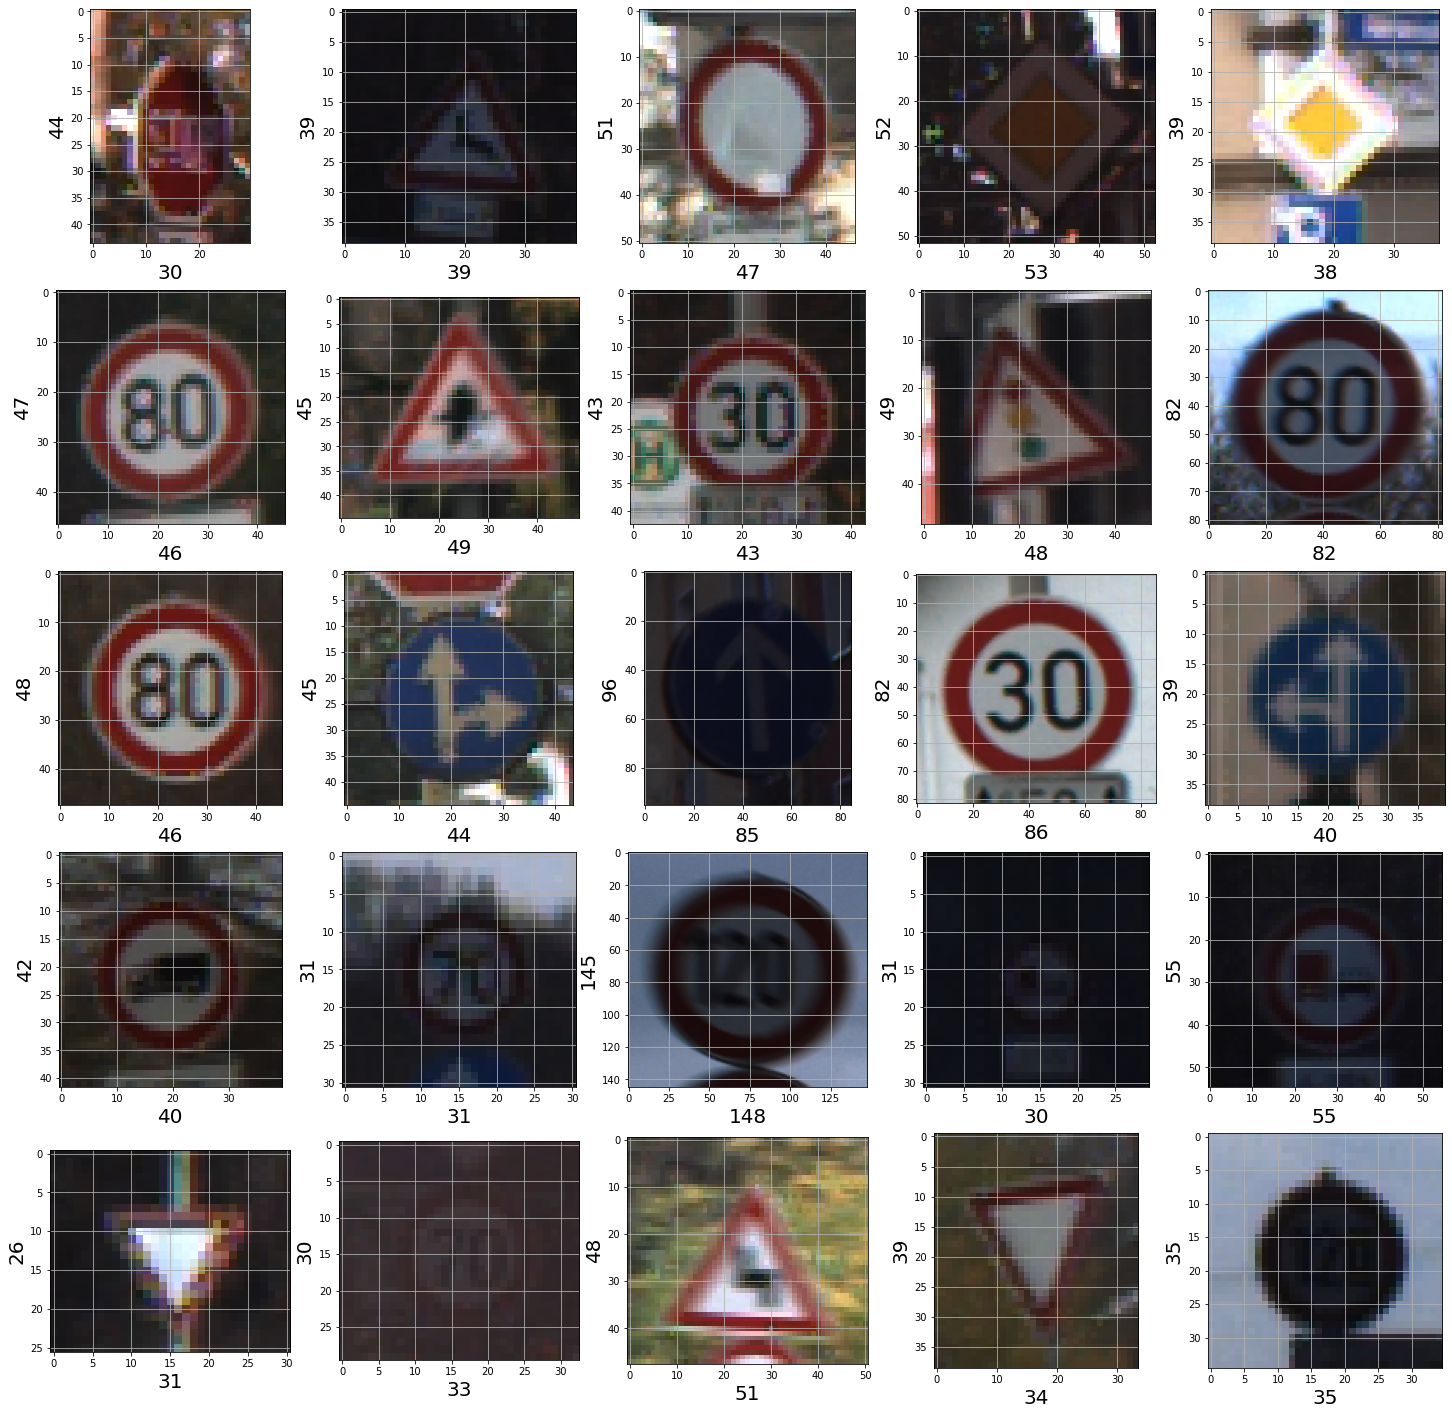

In [9]:
# Visualizing 25 random images

test = pd.read_csv('Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    # random_img_path = str(Path(data_dir))
    fullpath = random.choice(imgs)
    rand_img = imread(fullpath)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

As it can be seen from above, I have visualized some of the images from 25 classes randomly and as I have mentioned before the images also comes in different size.

# **V. PREPROCESSING DATA**

In this section, I will perform fetching the training data, splitting and shuffling the training data.

## 5.1 Fetching The Training Data

First, I will collect the training data and the labels. After the training data are collected, I will resize all of them into 50x50 pixels.

In [10]:
image_data = []
image_labels = []
a = str(Path(train_path))

for i in range(NUM_CATEGORIES):
    path = a + "/" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 50, 50, 3) (39209,)


## 5.2 Shuffling and Splitting The Data

In [11]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

Now, the training data will be splitted into two different parts, which are train and validation with the proportion of validation data is 30% of the total training data.

In [12]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 50, 50, 3)
X_valid.shape (11763, 50, 50, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


I will also encode the labels in `y_train` and `y_val` for modeling.

In [13]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# **VI. MODELING**

In this section, I will define the deep learning model by using Sequential API method.

## 6.1 MODEL DEFINITION

In [14]:
# Defining the layers

model = keras.models.Sequential([   
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)), 
    keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(43, activation='softmax')
])

The cell below is where I define the parameters for the model

In [15]:
# Defining the parameters

lr = 0.01
epochs = 10
opt = Adam(learning_rate=lr)

## 6.2 MODEL COMPILING

And now I will compile the model.

In [16]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Here is the model summary.

In [17]:
# Model Summarize
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                2

And here is the plot for the model that I have compiled.

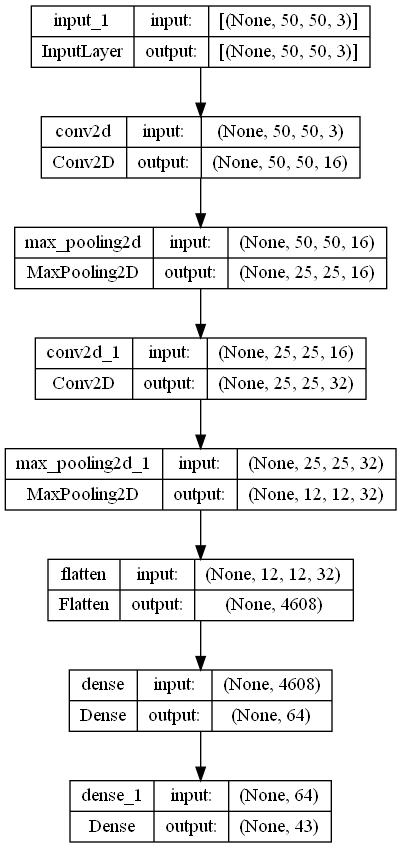

In [18]:
# Model plotting
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

Here I will augment the images by using ImageDataGenerator.

In [19]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=64), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
429/429 [==============================] - 79s 94ms/step - loss: 2.5726 - accuracy: 0.2648 - val_loss: 1.5157 - val_accuracy: 0.5022
Epoch 2/10
429/429 [==============================] - 44s 103ms/step - loss: 1.6456 - accuracy: 0.4742 - val_loss: 1.2478 - val_accuracy: 0.5880
Epoch 3/10
429/429 [==============================] - 46s 106ms/step - loss: 1.4921 - accuracy: 0.5214 - val_loss: 1.2138 - val_accuracy: 0.5965
Epoch 4/10
429/429 [==============================] - 46s 107ms/step - loss: 1.3830 - accuracy: 0.5596 - val_loss: 0.9677 - val_accuracy: 0.6964
Epoch 5/10
429/429 [==============================] - 43s 101ms/step - loss: 1.2949 - accuracy: 0.5834 - val_loss: 0.9491 - val_accuracy: 0.6881
Epoch 6/10
429/429 [==============================] - 43s 100ms/step - loss: 1.2417 - accuracy: 0.6039 - val_loss: 0.8837 - val_accuracy: 0.7153
Epoch 7/10
429/429 [==============================] - 43s 100ms/step - loss: 1.1856 - accuracy: 0.6209 - val_loss: 0.8335 - val_acc

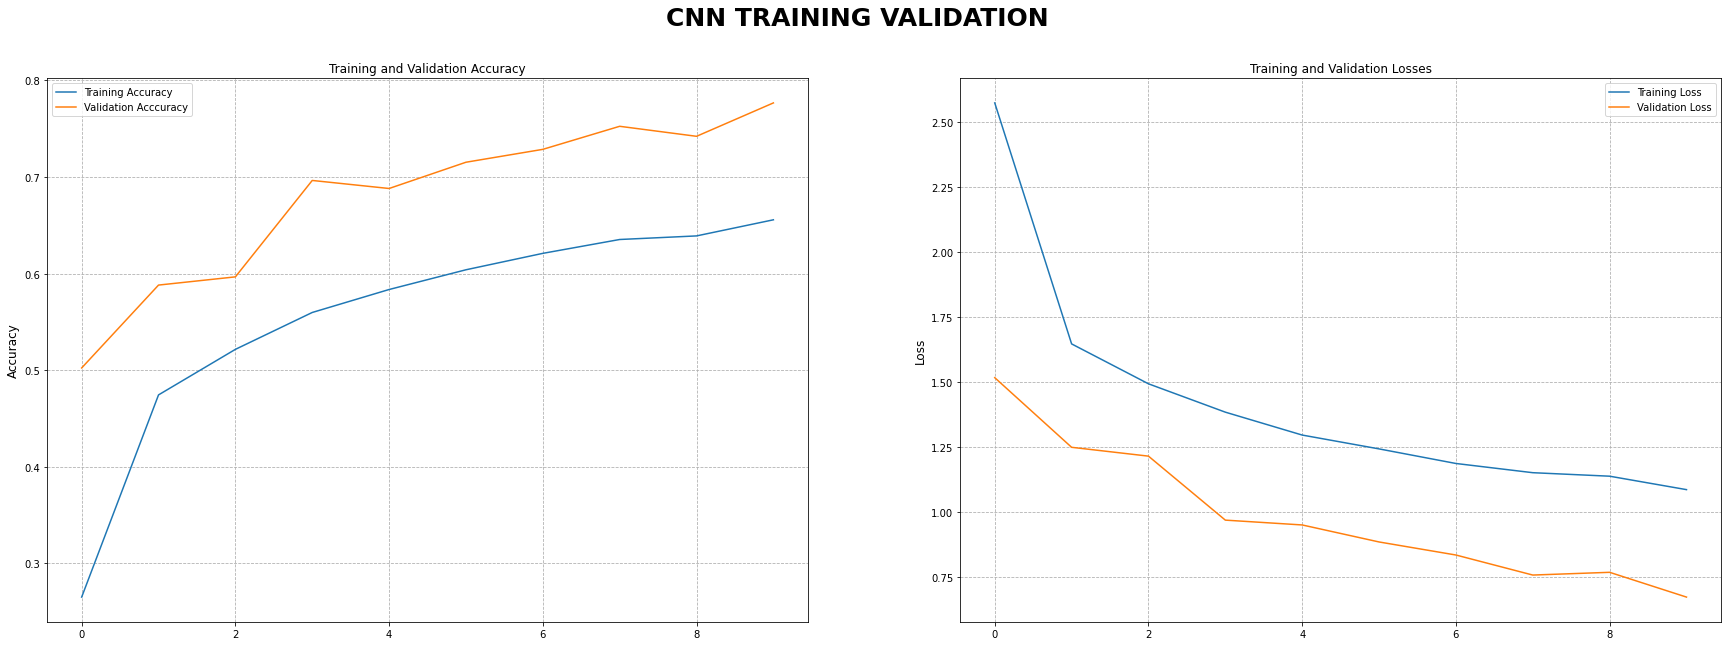

In [20]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('CNN TRAINING VALIDATION', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

The graphs above tells us the accuracy and the loss of the model that just have been trained. As it can be seen from the left graph, the accuracy of the model is still not performing well, the highest accuracy is 0.6557 while the validation is 0.7768. I will try to manually improve the model in the next section.

In [21]:
model.trainable = False

# **VIII. MODEL IMPROVEMENT**

As I have mentioned before, I will try to improve the model in this section by tuning the layers and optimizers and I will also add 10 more epochs.

In [22]:
# defining the improved model by adding more layers
IMP_model = keras.models.Sequential([   
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)), 
    keras.layers.Conv2D(16, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation='softmax')
])

In [23]:
# decreasing the learning rate and adding more epochs
lr = 0.001
epochs = 20
opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))


In [24]:
# compiling the improved model
IMP_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
# summarizing the improved model
IMP_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 128)      

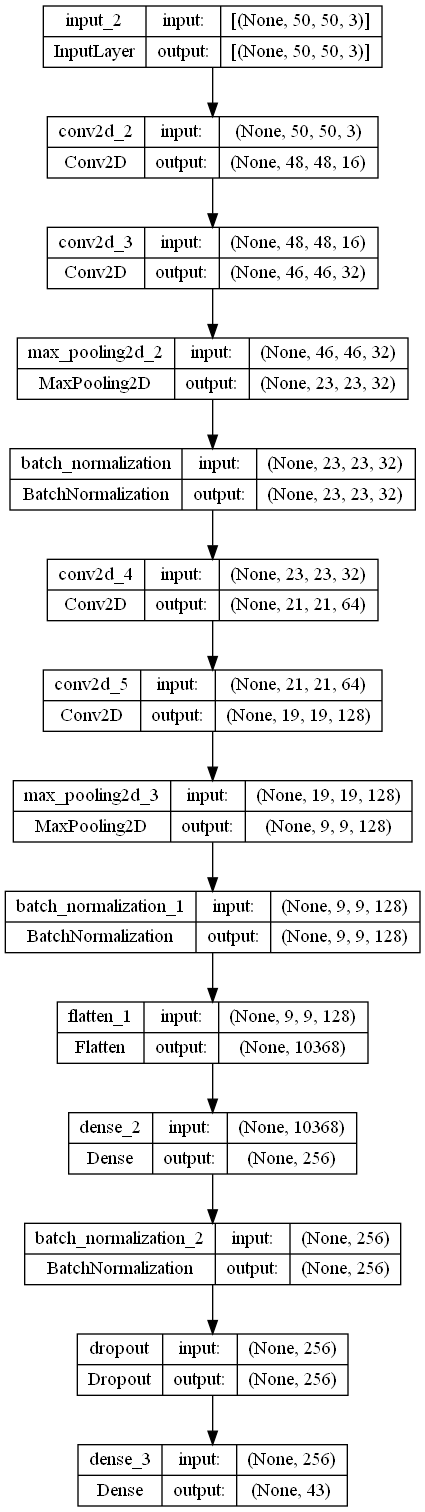

In [26]:
# Model plotting
tf.keras.utils.plot_model(IMP_model, show_shapes=True, show_layer_names=True)

In [27]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')>0.95):
#             self.model.stop_training = True
# 
# callbacker = myCallback()

In [28]:
aug2 = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

IMP_history = IMP_model.fit(aug2.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
858/858 [==============================] - 126s 142ms/step - loss: 1.0577 - accuracy: 0.7195 - val_loss: 0.0609 - val_accuracy: 0.9846
Epoch 2/20
858/858 [==============================] - 121s 141ms/step - loss: 0.1536 - accuracy: 0.9567 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 3/20
858/858 [==============================] - 118s 138ms/step - loss: 0.0893 - accuracy: 0.9734 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 4/20
858/858 [==============================] - 118s 138ms/step - loss: 0.0702 - accuracy: 0.9813 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 5/20
858/858 [==============================] - 121s 141ms/step - loss: 0.0586 - accuracy: 0.9820 - val_loss: 0.0292 - val_accuracy: 0.9922
Epoch 6/20
858/858 [==============================] - 122s 142ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.0124 - val_accuracy: 0.9967
Epoch 7/20
858/858 [==============================] - 125s 145ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0077 -

And now I will visualize the result of training the new improved model.

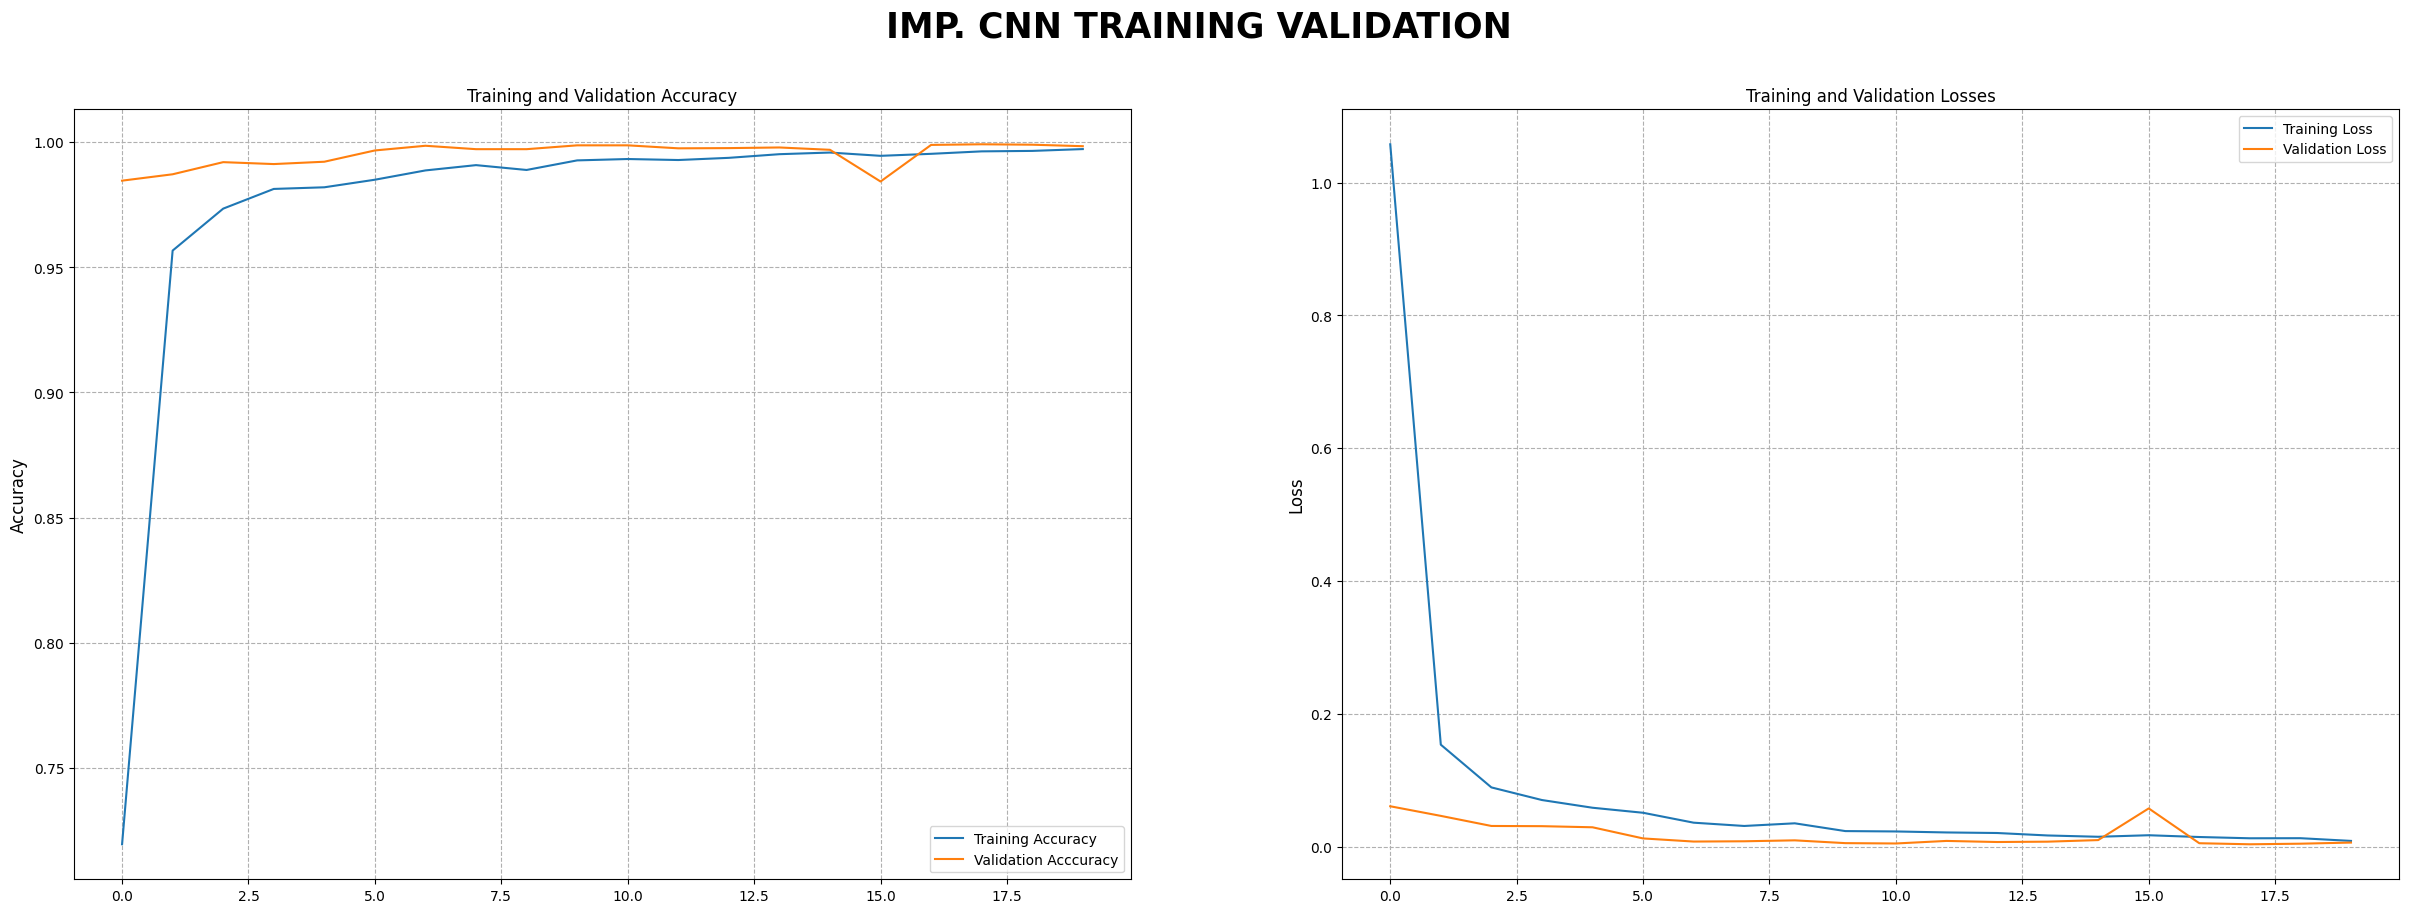

In [29]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('IMP. CNN TRAINING VALIDATION', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(IMP_history.history['accuracy'],label="Training Accuracy")
plt.plot(IMP_history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(IMP_history.history['loss'], label="Training Loss")
plt.plot(IMP_history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

It can be seen from the two graphs above, the model that has been created and improved has a significant increase in prediction results from the previous one. However, when viewed from the two graphs, we can see that the validation accuracy value had a higher value than the training accuracy value. Here are several reasons why this might be the case:

- Smaller datasets have smaller intrinsic variance so this means that your model properly captures patterns inside of your data and train error is greater simply because the inner variance of training set is greater then validation set.
- Simple accident - this might also occur - that your split is suitable for such behavior.

In [30]:
IMP_model.trainable = False

# **VIII. MODEL EVALUATION**

In this section, I will evaluate the improved model by testing it using the test the data

First, I will define again the test directory to avoid mistakes.

In [31]:
a = str(Path(data_dir))
a

'..\\P2M2'

And I will also resize the test images into 50x50 pixels because I haven't resize them before.

In [32]:
a = str(Path(data_dir))

test = pd.read_csv('Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(a + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(IMP_model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 13s 33ms/step
Test Data accuracy:  98.33729216152018


As it can be seen from the print result abov, the accuracy score of my improved model is 98.33 %. Clearly that it is way better before improved. Now I will plot the confusion matrix to see a clearer predicting result.

In [33]:
cf = confusion_matrix(labels, pred)

<AxesSubplot:>

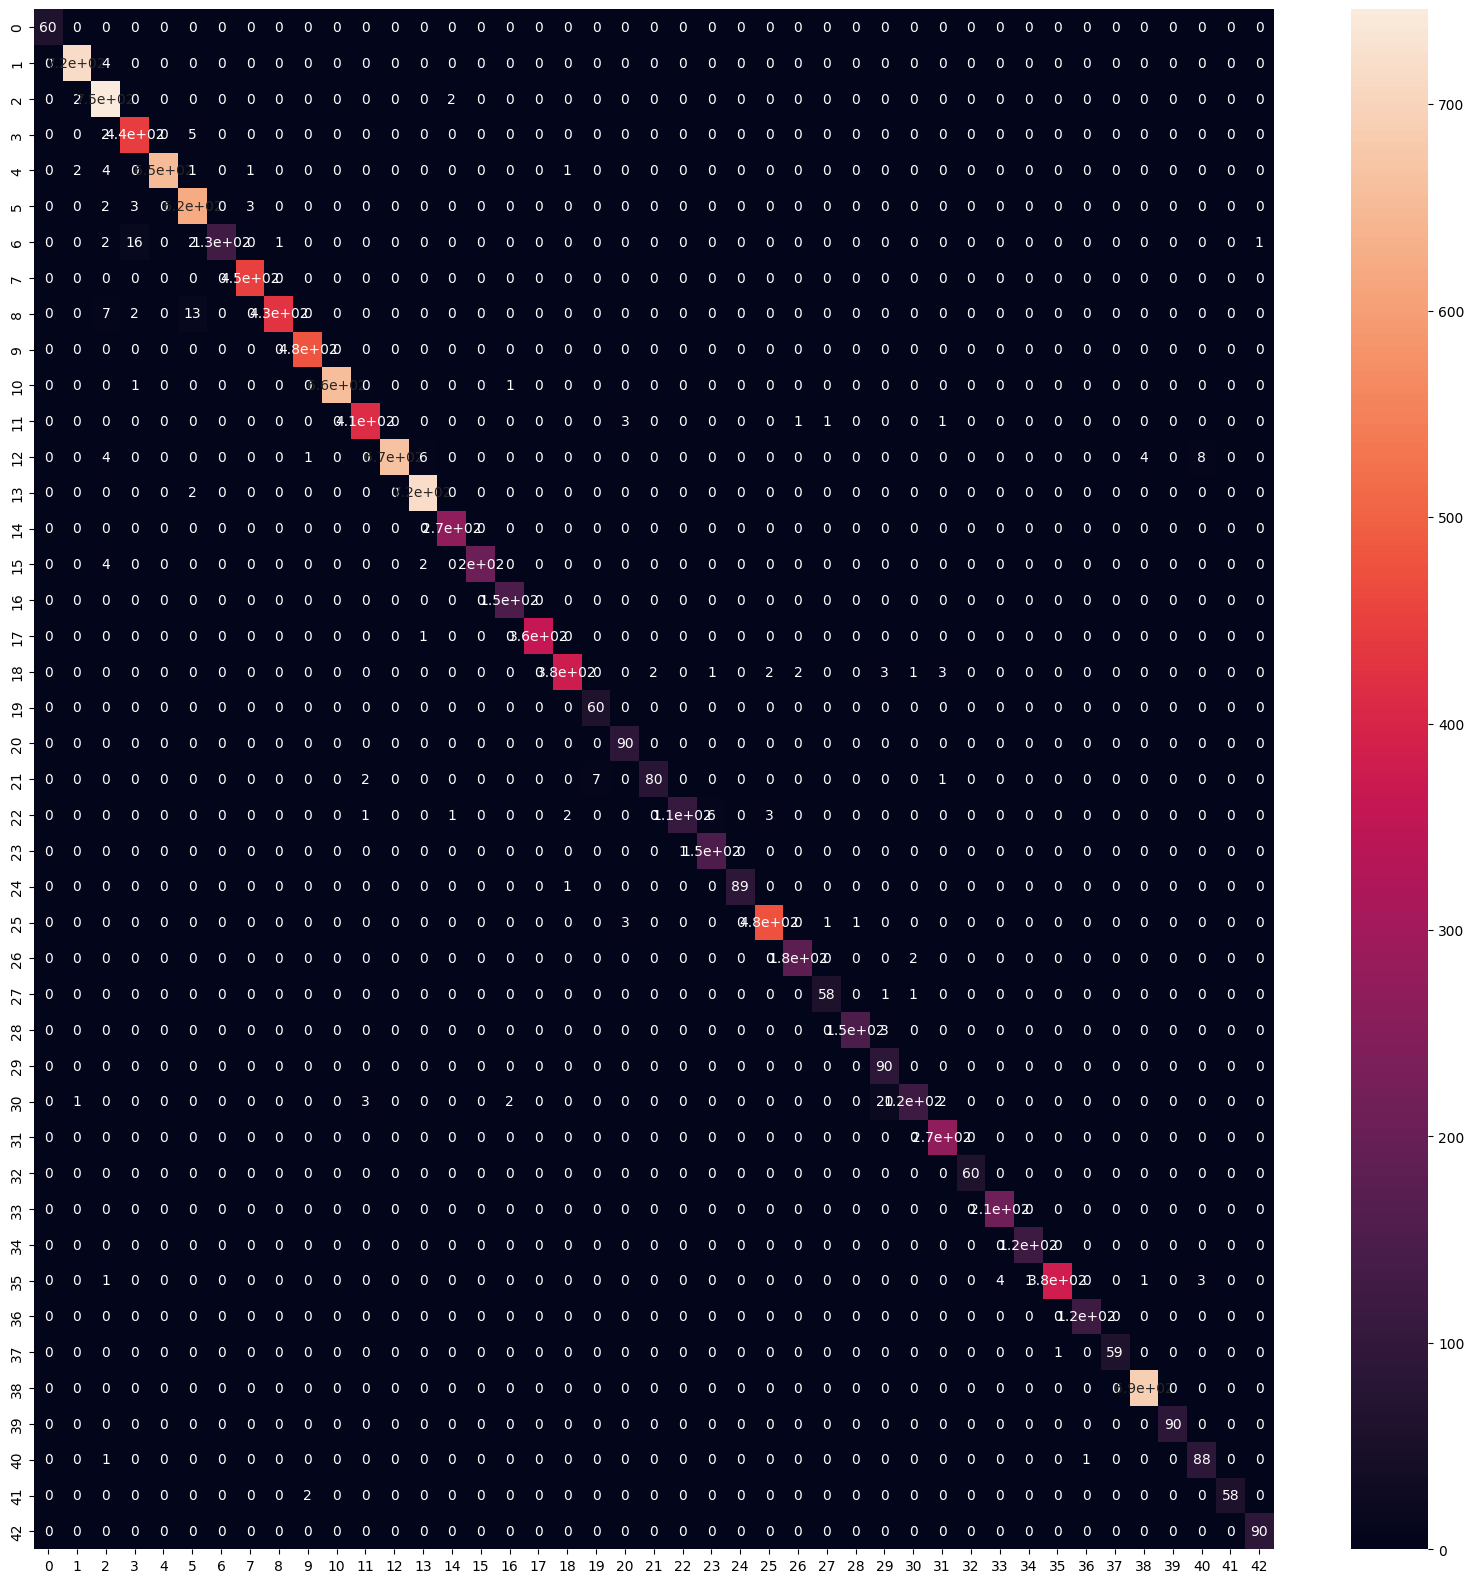

In [34]:
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

The picture above is a confusion matrix that describes the prediction results of the improved model. The confusion matrix looks like a heatmap because the classification carried out is a multiclass classification. In the confusion matrix, the Y axis is the `True Label` axis and the X axis is the `Predicted label`. To explain the confusion matrix above I will take class 1 or 'Speed ​​limit (30km/h)'. When viewed in the confusion matrix above for class 1 there is a prediction error. An example is an image that actually belongs to class 2 is predicted as a class 1 image and there are 2 images that are incorrectly predicted. The next example is an image that should be classified as class 4, but is predicted to be a class 1 image and there are 2 images that are incorrectly predicted by the model. This prediction error can be caused by several factors, such as unclear images, inaccurate image positions, image sizes that are not large enough to cause prediction errors and prediction errors can be caused by human error. Although there is an error in predicting the image, the error value of the deep learning model that has been created is very small because the total data amounts to about 50 thousand images.

# **IX. MODEL SAVING**

I am saving the improved model for deployment the deep learning model.

In [35]:
# Model saving
IMP_model.save('CNN_MOD_IMP.h5')
np.save('history_cnn_model_improved.npy', IMP_history.history)

# **X. MODEL INFERENCE**

In this section I will try to use a new image obtained from Google and the load the data into the notebook.

In [36]:
# Defining testing image
test_image = r'C:\Users\alexa\Desktop\Hacktiv8\learning_journey\h8-learning-journey\PHASE_2\phase2_milestone\P2M2\Road-signs-in-Germany-Inference.JPG'

# Image predict
img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

In [37]:
# Image manipulation
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
# Image predicting
predictions = IMP_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
# Showing the result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 266ms/step
This image most likely belongs to 23 with a 6.08 percent confidence.


The model inference is done by taking data through Google and trying to do recognition using the model that has been created. The model can recognize images well even though the confidence percentage is not too high.

# **XI. CONCLUSION**

Based on the analysis that has been done, below are the conclusions that I can get:

1. A model for classifying images of road signs in Germany has been created using the Sequential Method API.
2. Based on the model that has been made, there are 2 models where the first model has a training accuracy value of about 60% and the second model (improved model) has a training accuracy of 99%. Therefore, the second model is used to conduct trials on the test dataset and produce an accuracy of prediction results of 98%.
3. This prediction error can be caused by several factors, such as unclear images, inaccurate image positions, image sizes that are not large enough to cause prediction errors and prediction errors can be caused by human error. Although there is an error in predicting the image, the error value of the deep learning model that has been created is very small because the total data amounts to about 50 thousand images.
4. With this, the model that has been created can be implemented for further use such as vehicle automation or for further learning.

Suggestions for further development:

1. Use another CNN method or maybe try a pre-trained model.
2. More precise image data augmentation
3. Use of more powerful hardware to speed up computing
4. The use of more updated datasets and using road signs in Indonesia.

# REFERENCES

1. https://stackoverflow.com/questions/43979449/higher-validation-accuracy-than-training-accurracy-using-tensorflow-and-keras
2. https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-96-cnn